In [0]:
import sys, os, shutil
from glob import glob
import numpy as np

## Change Runtime on Colab

## Get Data

In [0]:
!apt-get install tree
!pip install tqdm
!pip install -U kaggle-cli

In [0]:
def chdir_home():
    pwd = !pwd
    if pwd[0].count('/') > 1 :
        os.chdir((pwd[0].count('/')-1)*'../')

In [0]:
# Download in home directory
chdir_home()
!kg download -u skakki -p akshaykumar -c dogs-vs-cats-redux-kernels-edition

In [0]:
!mkdir -p data/redux
!unzip train.zip -d data/redux
!unzip test.zip -d data/redux

In [0]:
!mkdir -p data/redux/test/unknown/
!mkdir -p data/redux/train/cats
!mkdir -p data/redux/train/dogs
!mkdir -p data/redux/valid/cats
!mkdir -p data/redux/valid/dogs
!mkdir -p data/redux/results

!mkdir -p data/redux/sample/train/cats
!mkdir -p data/redux/sample/train/dogs
!mkdir -p data/redux/sample/valid/cats
!mkdir -p data/redux/sample/valid/dogs
!mkdir -p data/redux/sample/test/unknown
!mkdir -p data/redux/sample/results

In [0]:
# these paths are when you are at home directory
chdir_home()

path = 'data/redux/'
path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
sample_path = path+'sample/'
results_path = path+'results/'
model_path = path+'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [0]:
# copy 1200 images from train and 600 from test to sample
g = glob(train_path+'*.jpg')
g = np.random.permutation(g)
for i in range(1200):
    shutil.copy(g[i], sample_path+'train/')

g = glob(test_path+'*.jpg')
g = np.random.permutation(g)
for i in range(600):
    shutil.copy(g[i], sample_path+'test/')


# Move 100 images from sample/train to sample/valid
g = glob(sample_path+'train/*.jpg')
g = np.random.permutation(g)
for i in range(100):
    shutil.move(g[i], sample_path+'valid/')


# move 2000 images from train to valid directory

g = glob(train_path+'*.jpg')
g = np.random.permutation(g)
for i in range(2000):
    shutil.move(g[i], val_path)



In [0]:
# move image in corresponsing label directories

!mv sample_submission.csv data/redux/

!mv data/redux/test/*.jpg data/redux/test/unknown/
!mv data/redux/train/cat*.jpg data/redux/train/cats/
!mv data/redux/train/dog*.jpg data/redux/train/dogs/
!mv data/redux/valid/dog*.jpg data/redux/valid/dogs/
!mv data/redux/valid/cat*.jpg data/redux/valid/cats/

!mv data/redux/sample/valid/cat*.jpg data/redux/sample/valid/cats/
!mv data/redux/sample/valid/dog*.jpg data/redux/sample/valid/dogs/
!mv data/redux/sample/train/cat*.jpg data/redux/sample/train/cats/
!mv data/redux/sample/train/dog*.jpg data/redux/sample/train/dogs/
!mv data/redux/sample/test/*.jpg data/redux/sample/test/unknown/


In [11]:
!tree data/ -d

data/
└── redux
    ├── models
    ├── results
    ├── sample
    │   ├── results
    │   ├── test
    │   │   └── unknown
    │   ├── train
    │   │   ├── cats
    │   │   └── dogs
    │   └── valid
    │       ├── cats
    │       └── dogs
    ├── test
    │   └── unknown
    ├── train
    │   ├── cats
    │   └── dogs
    └── valid
        ├── cats
        └── dogs

21 directories


## Install Packages

Following packages need to installed everytime. Also first change directory to the location where this notebook is located. 

In [0]:
!pip install tqdm
!pip install bcolz
!pip install keras==1.2

In [0]:
# theano and libgpu installation 

# !pip install theano

# ! git clone https://github.com/Theano/libgpuarray.git
# !mkdir -p libgpuarray/Build/
# os.chdir('libgpuarray/Build')

# !apt-get install -y cmake
# ! cmake .. -DCMAKE_BUILD_TYPE=Release
# ! make
# ! make install

# ! pip install --upgrade cython
# os.chdir('../')
# !python setup.py build
# !python setup.py install
# os.chdir('../')


## Utility functions

Now that we have organised our data lets finetune VGG16 model. 

## Finetune using VGG

In [16]:
chdir_home()
os.chdir('drive/workspace/Dogs-Cats-Redux/')

%matplotlib inline
import sys, os, shutil
from glob import glob
import numpy as np
from utils import *
from vgg16 import Vgg16
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink

from keras.utils.np_utils import to_categorical

chdir_home()

Using TensorFlow backend.


In [0]:
batch_size=64
no_epochs=5

path = 'data/redux/'
# path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
results_path = path+'results/'

In [29]:
vgg = Vgg16()
train_batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(val_path, batch_size=batch_size)
vgg.finetune(train_batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
latest_weights_filename = None
for epoch in range(no_epochs):
    print ("\nRunning Epoch :  {0}".format(epoch))
    vgg.fit(train_batches, val_batches, nb_epoch=1)
    latest_weights_filename = "ft{0}.h5".format(epoch)
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed {0} fit operation\n".format(no_epochs))


Running Epoch :  0
Epoch 1/1
23000/23000 [==============================] - 434s - loss: 0.4264 - acc: 0.8679 - val_loss: 0.2103 - val_acc: 0.9270

Running Epoch :  1
Epoch 1/1
14144/23000 [=================>............] - ETA: 152s - loss: 0.3533 - acc: 0.8916

23000/23000 [==============================] - 430s - loss: 0.3590 - acc: 0.8897 - val_loss: 0.2304 - val_acc: 0.9160

Running Epoch :  2
Epoch 1/1
23000/23000 [==============================] - 431s - loss: 0.3499 - acc: 0.8925 - val_loss: 0.1824 - val_acc: 0.9330

Running Epoch :  3
Epoch 1/1
  576/23000 [..............................] - ETA: 424s - loss: 0.3691 - acc: 0.8837

23000/23000 [==============================] - 431s - loss: 0.3380 - acc: 0.8947 - val_loss: 0.1949 - val_acc: 0.9330

Running Epoch :  4
Epoch 1/1
19200/23000 [========================>.....] - ETA: 65s - loss: 0.3435 - acc: 0.8947

23000/23000 [==============================] - 430s - loss: 0.3495 - acc: 0.8940 - val_loss: 0.1881 - val_acc: 0.9350
Completed 5 fit operation



In [0]:
for epoch in range(no_epochs):
    print ("Epoch {0}".format(epoch))
    vgg.model.load_weights(filepath=results_path+'ft{0}.h5'.format(epoch))
    test_batches, test_preds = vgg.test(test_path, batch_size=batch_size)
    isdog = test_preds[:,1]
    isdog = isdog.clip(min=0.05, max=0.95)
    test_filenames = test_batches.filenames
    test_file_ids = [int(f[8:-4]) for f in test_filenames]
    subm = np.stack([test_file_ids, isdog], axis=1)
    subm_filename = "submission{0}.csv".format(epoch)
    np.savetxt(subm_filename, subm, fmt='%d,%0.5f', header='id,label', comments='')


So after trying a lot we see that we get a val_acc of only 0.935 . Any way let's move and visualise predictions. 

## Visualise predictions


In [34]:
val_batches, probs = vgg.test(val_path, batch_size)

Found 2000 images belonging to 2 classes.


In [0]:
filenames = val_batches.filenames
val_labels = val_batches.classes
preds = np.argmax(probs, axis=1)


In [0]:
def plot_idx(idx, titles=None):
  plots([image.load_img(val_path+filenames[i]) for i in idx], titles=titles)

n_view=4

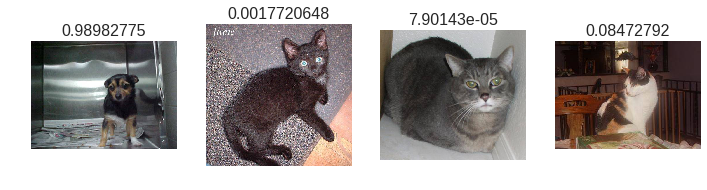

In [37]:
# Some random correct predictions
correct = np.where(preds==val_labels)[0]
idx = np.random.permutation(correct)[:n_view]
plot_idx(idx, probs[idx][:,1])

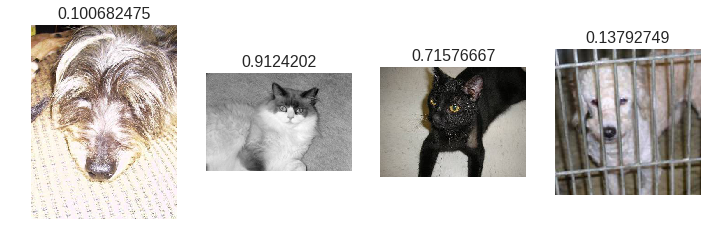

In [32]:
# Some random incorrect predictions
incorrect = np.where(preds!=val_labels)[0]
idx = np.random.permutation(incorrect)[:n_view]
plot_idx(idx, probs[idx][:,1])

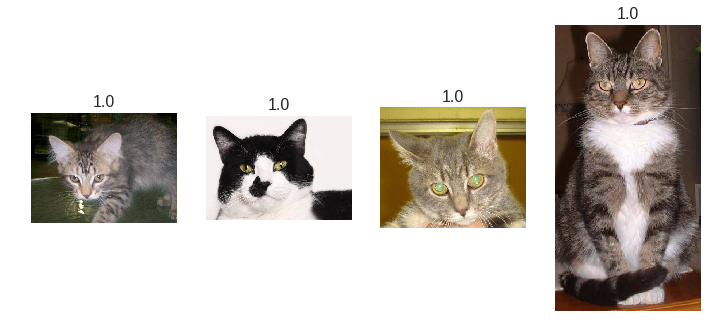

In [33]:
#  The images we were most confident were cats, and are actually cats
correct = np.where(preds==val_labels)[0]
idx = np.argsort(probs[correct][:,0])[::-1][:n_view]
plot_idx(correct[idx], probs[correct][idx][:,0])

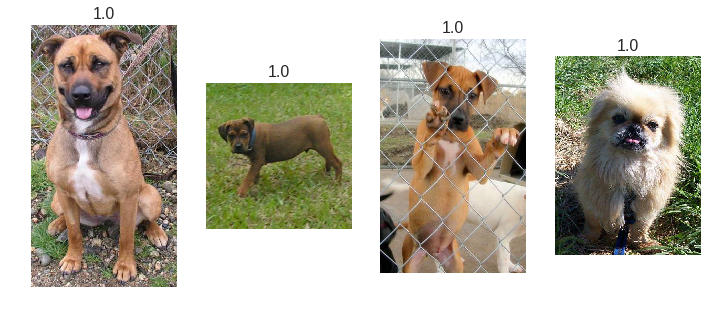

In [35]:
# Image we were most confident were dogs and are actually dogs

correct = np.where(preds==val_labels)[0]
idx = np.argsort(probs[correct][:,1])[::-1][:n_view]
plot_idx(correct[idx], probs[correct][idx][:,1])

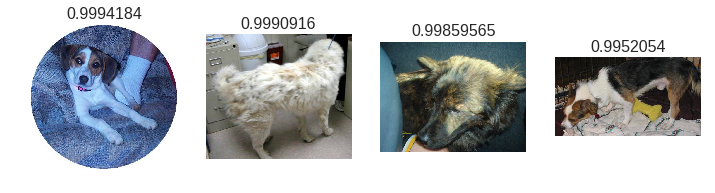

In [46]:
# The images we were most confident were cats, but are actually dogs

incorrect = np.where((preds==0) & (preds!=val_labels))[0]
idx = np.argsort(probs[incorrect][:,0])[::-1][:n_view]
plot_idx(incorrect[idx], probs[incorrect[idx]][:,0])

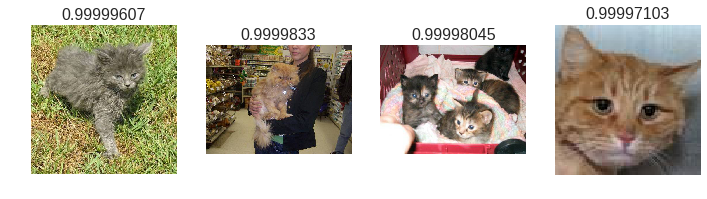

In [48]:
# The images we were most confident were dogs, but are actually cats

incorrect = np.where((preds==1) & (preds!=val_labels))[0]
idx = np.argsort(probs[incorrect][:,1])[::-1][:n_view]
plot_idx(incorrect[idx], probs[incorrect[idx]][:,1])

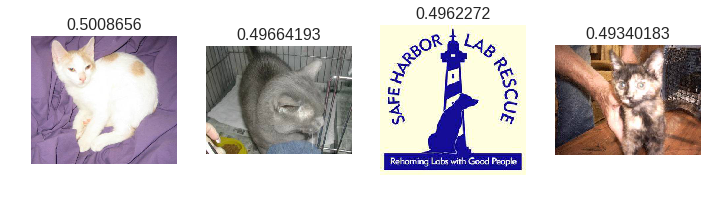

In [56]:
#  Most uncertain labels

idx = np.argsort(abs(probs[:,0]-0.5))[:n_view]
plot_idx(idx, probs[idx][:,0])

[[950  83]
 [ 50 917]]


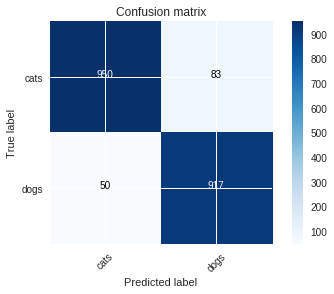

In [58]:
cm = confusion_matrix(val_labels, preds)
plot_confusion_matrix(cm, val_batches.class_indices)

## Train Linear model on VGG predictions

In [0]:
chdir_home()
os.chdir('drive/workspace/Dogs-Cats-Redux/')

%matplotlib inline
import sys, os, shutil
from glob import glob
import numpy as np
from utils import *
from vgg16 import Vgg16
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink

from keras.utils.np_utils import to_categorical

chdir_home()

In [0]:
# these paths are when you are at home directory
chdir_home()

path = 'data/redux/'
# path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
sample_path = path+'sample/'
results_path = path+'results/'
model_path = path+'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [0]:
vgg =Vgg16()
model = vgg.model

In [48]:
batch_size=64
nb_epoch=5
val_batches = get_batches(val_path, batch_size=batch_size)
trn_batches = get_batches(train_path, batch_size=batch_size)

Found 2000 images belonging to 2 classes.
Found 23000 images belonging to 2 classes.


In [0]:
val_classes = val_batches.classes
trn_classes = trn_batches.classes
val_labels = to_categorical(val_classes, val_batches.nb_class)
trn_labels = to_categorical(trn_classes, trn_batches.nb_class)

In [0]:
trn_feat = model.predict_generator(trn_batches, trn_batches.nb_sample)
val_feat = model.predict_generator(val_batches, val_batches.nb_sample)

In [51]:
print (trn_feat.shape)
print (val_feat.shape)

(23000, 1000)
(2000, 1000)


In [0]:
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])
lm.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
lm.fit(trn_feat, trn_labels, batch_size, nb_epoch=nb_epoch, validation_data=(val_feat, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/20
23000/23000 [==============================] - 1s - loss: 0.6931 - acc: 0.5006 - val_loss: 0.6934 - val_acc: 0.5035
Epoch 2/20
23000/23000 [==============================] - 1s - loss: 0.6931 - acc: 0.5023 - val_loss: 0.6933 - val_acc: 0.5030
Epoch 3/20
13248/23000 [================>.............] - ETA: 0s - loss: 0.6930 - acc: 0.5079

23000/23000 [==============================] - 1s - loss: 0.6930 - acc: 0.5053 - val_loss: 0.6933 - val_acc: 0.5060
Epoch 4/20
23000/23000 [==============================] - 1s - loss: 0.6929 - acc: 0.5072 - val_loss: 0.6933 - val_acc: 0.5030
Epoch 5/20
23000/23000 [==============================] - 1s - loss: 0.6929 - acc: 0.5109 - val_loss: 0.6933 - val_acc: 0.5035
Epoch 6/20
 1024/23000 [>.............................] - ETA: 1s - loss: 0.6932 - acc: 0.5000

23000/23000 [==============================] - 1s - loss: 0.6928 - acc: 0.5115 - val_loss: 0.6934 - val_acc: 0.5025
Epoch 7/20
23000/23000 [==============================] - 1s - loss: 0.6928 - acc: 0.5122 - val_loss: 0.6933 - val_acc: 0.5020
Epoch 8/20
22528/23000 [============================>.] - ETA: 0s - loss: 0.6927 - acc: 0.5194

23000/23000 [==============================] - 1s - loss: 0.6927 - acc: 0.5188 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 9/20
23000/23000 [==============================] - 1s - loss: 0.6926 - acc: 0.5179 - val_loss: 0.6934 - val_acc: 0.5005
Epoch 10/20
23000/23000 [==============================] - 1s - loss: 0.6926 - acc: 0.5194 - val_loss: 0.6934 - val_acc: 0.5015
Epoch 11/20
 3904/23000 [====>.........................] - ETA: 1s - loss: 0.6927 - acc: 0.5113

23000/23000 [==============================] - 1s - loss: 0.6925 - acc: 0.5189 - val_loss: 0.6934 - val_acc: 0.5010
Epoch 12/20
23000/23000 [==============================] - 1s - loss: 0.6925 - acc: 0.5226 - val_loss: 0.6934 - val_acc: 0.4955
Epoch 13/20
23000/23000 [==============================] - 1s - loss: 0.6924 - acc: 0.5222 - val_loss: 0.6934 - val_acc: 0.4935
Epoch 14/20
   64/23000 [..............................] - ETA: 3s - loss: 0.6928 - acc: 0.4844

23000/23000 [==============================] - 1s - loss: 0.6924 - acc: 0.5232 - val_loss: 0.6934 - val_acc: 0.4995
Epoch 15/20
23000/23000 [==============================] - 1s - loss: 0.6923 - acc: 0.5248 - val_loss: 0.6934 - val_acc: 0.4985
Epoch 16/20
22848/23000 [============================>.] - ETA: 0s - loss: 0.6923 - acc: 0.5271

23000/23000 [==============================] - 1s - loss: 0.6922 - acc: 0.5274 - val_loss: 0.6934 - val_acc: 0.4970
Epoch 17/20
23000/23000 [==============================] - 1s - loss: 0.6922 - acc: 0.5274 - val_loss: 0.6934 - val_acc: 0.4965
Epoch 18/20
23000/23000 [==============================] - 1s - loss: 0.6921 - acc: 0.5286 - val_loss: 0.6934 - val_acc: 0.4975
Epoch 19/20
 3008/23000 [==>...........................] - ETA: 1s - loss: 0.6921 - acc: 0.5273

23000/23000 [==============================] - 1s - loss: 0.6921 - acc: 0.5274 - val_loss: 0.6934 - val_acc: 0.4960
Epoch 20/20
23000/23000 [==============================] - 1s - loss: 0.6920 - acc: 0.5297 - val_loss: 0.6934 - val_acc: 0.4965


In [77]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_46 (Dense)                 (None, 2)             2002        dense_input_3[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [44]:
preds = lm.predict_classes(val_feat, batch_size=batch_size)


1664/2000 [=======================>......] - ETA: 0s

In [47]:
preds.sum()

1164

## Modifying VGG

In [0]:
chdir_home()
os.chdir('drive/workspace/Dogs-Cats-Redux/')

%matplotlib inline
import sys, os, shutil
from glob import glob
import numpy as np
from utils import *
from vgg16 import Vgg16
from PIL import Image
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink

from keras.utils.np_utils import to_categorical

chdir_home()

In [0]:
# these paths are when you are at home directory
chdir_home()

# path = 'data/redux/'
path = 'data/redux/sample/'

train_path = path+'train/'
val_path = path+'valid/'
test_path = path+'test/'
sample_path = path+'sample/'
results_path = path+'results/'
model_path = path+'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [0]:
vgg.model.summary()

In [0]:
model.pop()
for layer in model.layers : layer.trainable=False


In [0]:
model.add(Dense(2, activation='softmax'))

In [65]:
gen = image.ImageDataGenerator()
trn_batches = gen.flow_from_directory(train_path, batch_size=batch_size, shuffle=True)
val_batches = gen.flow_from_directory(val_path, batch_size=batch_size, shuffle=True)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
def fit_model(model, trn_batches, val_batches, nb_epoch=1):
#   model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
  model.fit_generator(trn_batches, trn_batches.nb_sample, nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
  

In [0]:
opt = RMSprop(lr=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
fit_model(model, trn_batches, val_batches, nb_epoch=2)

Epoch 1/2


ValueError: ignored